In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

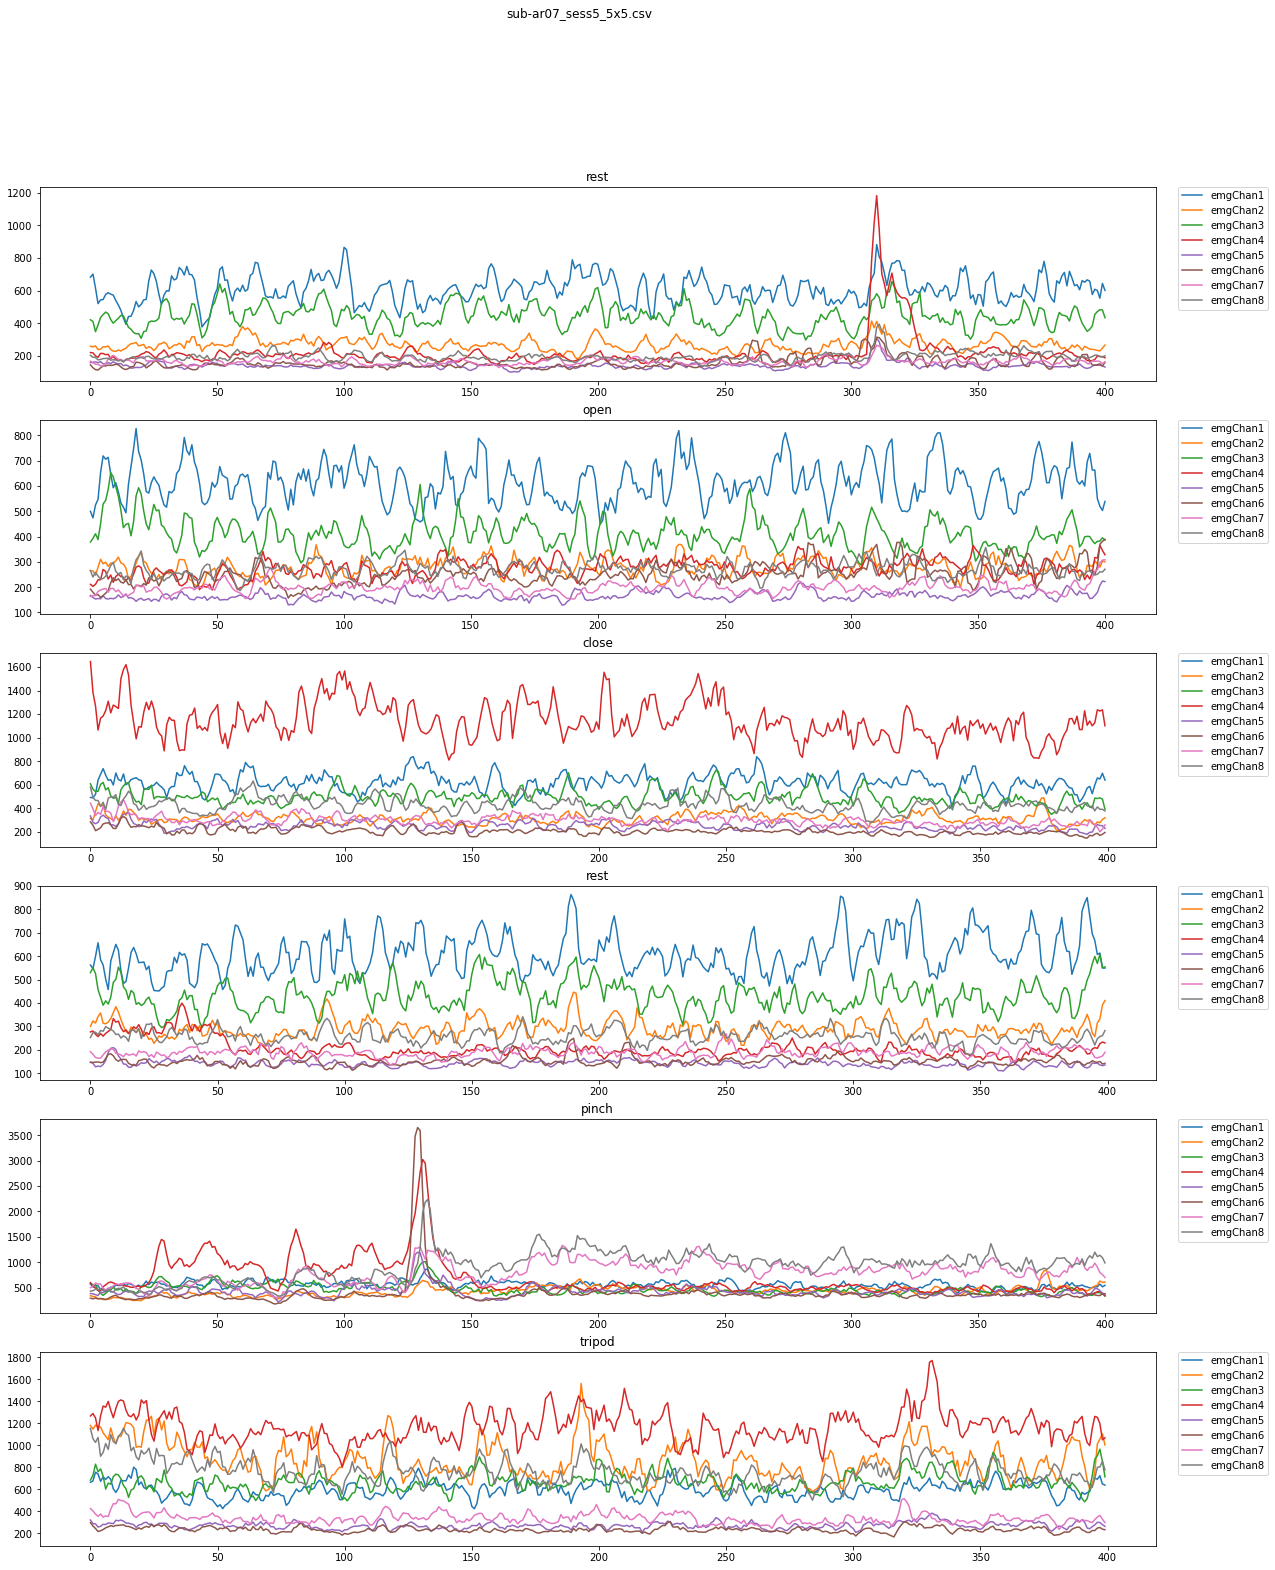

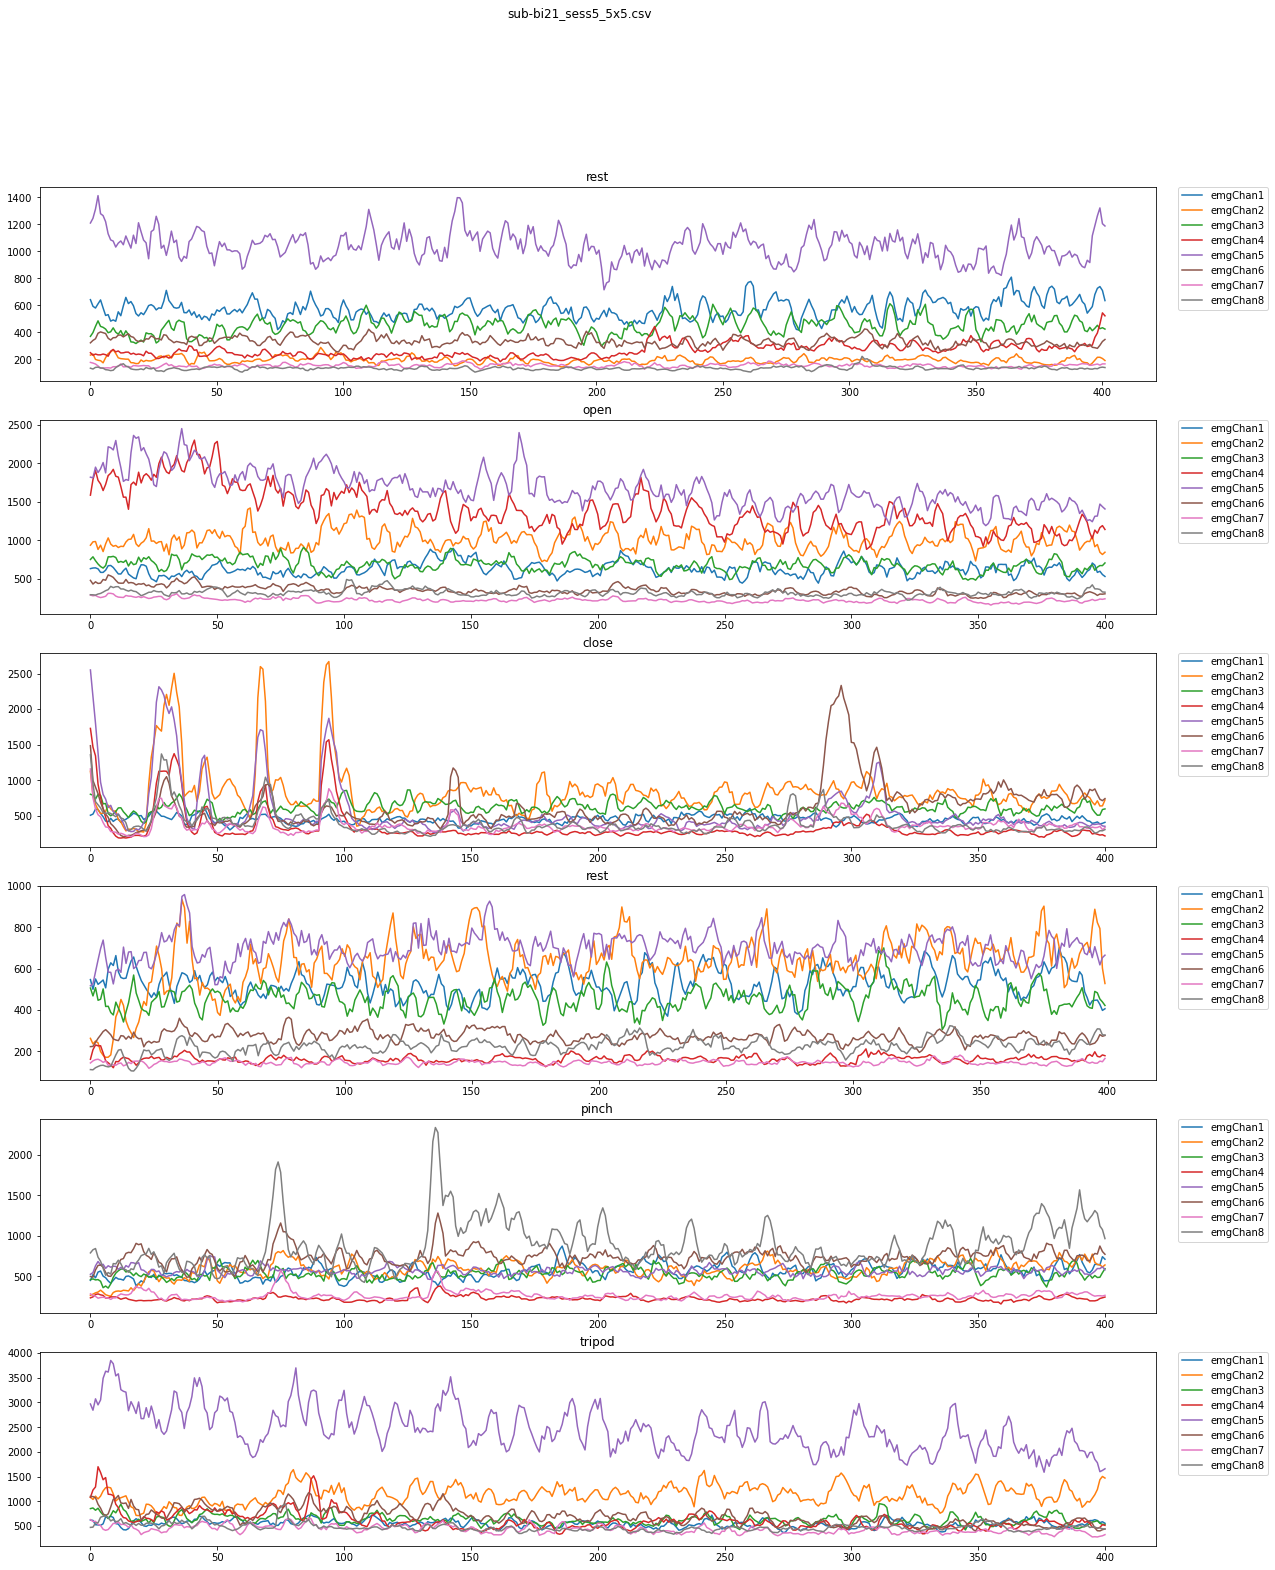

In [2]:
prepped_bio_5x5 = glob.glob('5x5_ArmGameData/bio/sub-bi*.csv')
prepped_arb_5x5 = glob.glob('5x5_ArmGameData/arb/sub-ar*.csv')

file_groups = [(prepped_arb_5x5, 'arb'), (prepped_bio_5x5, 'bio')]

gesture_dict = {0:'rest',17:'open',18:'close',38:'tripod',40:'pinch'}
goals = [0,17,18,0,40,38]

colors = ['red','blue','yellow','orange','purple','green','']



for file_group in file_groups:
    files = file_group[0]
    group = file_group[1]

    for file in files:
        hold = pd.read_csv(file)

        fig, axes = plt.subplots(6,1, figsize=(20,25))
        fig.suptitle(file.split('/')[-1])

        for which_chunk in range(0,6):

            curr_chunk = hold.loc[(hold['chunk'] == which_chunk) & (hold['entryType'] == 0)]

            curr_chunk = curr_chunk.reset_index(drop=True)

            emg_columns = [col for col in curr_chunk.columns if 'emg' in col]

            title = gesture_dict[goals[which_chunk]]

            sns.lineplot(ax = axes[which_chunk], data = curr_chunk[emg_columns], dashes=False)

            axes[which_chunk].set_title(title)          

            axes[which_chunk].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

        save_folder = 'EMG_lineplots/'
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)

        save_path = save_folder + file.split('/')[-1].split('_')[0]

        plt.savefig(save_path)

        break
